Code for finding damping of surface waves, experiments conducted 26.03.25. See: https://docs.google.com/document/d/1XbN39MnCO8LLxHQggMc_9GKM4Xrf986bgcMyIGY5DgE/edit?usp=share_link for report. 

Viscous boundary layer height for oscillatory flow:

$\delta = \sqrt{\frac{2 \nu}{2\pi f}}$

In [168]:
f = 1
mu = 10e-6
delta = np.sqrt((2*mu)/(2*np.pi*f))  # [m]
print(f'{delta*1000} mm')

1.7841241161527712 mm


In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Only using 1 Hertz frequency data:

In [170]:
headers = ['time', 'p2', 'p1', 'p4', 'p3', 'speed_of_sound']

In [ ]:
 # Reading in the data
x9793_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run1.csv', names=headers)
x9793_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run2.csv', names=headers)
x9793_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run3.csv', names=headers)

x1059_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run1.csv', names=headers)
x1059_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run2.csv', names=headers)
x1059_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run3.csv', names=headers)

x1135_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run1.csv', names=headers)
x1135_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run2.csv', names=headers)
x1135_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run3.csv', names=headers)

In [172]:
x9793_f1_r1

,time,p2,p1,p4,p3,speed_of_sound
0,01/01/2014 01:37:43.332,-0.00006,-0.00005,-0.00003,-0.00009,342.18
1,01/01/2014 01:37:43.336,-0.00006,-0.00005,-0.00003,-0.00009,342.18
2,01/01/2014 01:37:43.340,-0.00006,-0.00005,-0.00003,-0.00009,342.18
3,01/01/2014 01:37:43.344,-0.00006,0.00004,-0.00012,-0.00009,342.18
4,01/01/2014 01:37:43.348,-0.00006,-0.00005,-0.00003,0.00000,342.18
...,...,...,...,...,...,...
7491,01/01/2014 01:38:13.296,0.01380,0.00030,0.00450,0.01711,342.18
7492,01/01/2014 01:38:13.300,0.01354,-0.00005,0.00484,0.01711,342.18
7493,01/01/2014 01:38:13.304,0.01337,-0.00047,0.00536,0.01728,342.18
7494,01/01/2014 01:38:13.308,0.01303,-0.00090,0.00570,0.01753,342.18


- mean of first 1000 lines, as probes were not on zero
- largets value probe gives, largest distance, so out of phase.

In [276]:
def cleaning_df(df):
    for column in range(1, 5):
        mean = df.iloc[:1000, column].mean()
        df.iloc[:, column] = df.iloc[:, column] - mean
    return df

In [277]:
x9_f1_r1 = cleaning_df(x9793_f1_r1)
x9_f1_r2 = cleaning_df(x9793_f1_r2)
x9_f1_r3 = cleaning_df(x9793_f1_r3)

x10_f1_r1 = cleaning_df(x1059_f1_r1)
x10_f1_r2 = cleaning_df(x1059_f1_r2)
x10_f1_r3 = cleaning_df(x1059_f1_r3)

x11_f1_r1 = cleaning_df(x1135_f1_r1)
x11_f1_r2 = cleaning_df(x1135_f1_r2)
x11_f1_r3 = cleaning_df(x1135_f1_r3)

In [279]:
# Converting the timestamps to datetime values
x9_f1_r1['time'] = pd.to_datetime(x9_f1_r1['time'])
x9_f1_r2['time'] = pd.to_datetime(x9_f1_r2['time'])
x9_f1_r3['time'] = pd.to_datetime(x9_f1_r3['time'])


x10_f1_r1['time'] = pd.to_datetime(x10_f1_r1['time'])
x10_f1_r2['time'] = pd.to_datetime(x10_f1_r2['time'])
x10_f1_r3['time'] = pd.to_datetime(x10_f1_r3['time'])

x11_f1_r1['time'] = pd.to_datetime(x11_f1_r1['time'])
x11_f1_r2['time'] = pd.to_datetime(x11_f1_r2['time'])
x11_f1_r3['time'] = pd.to_datetime(x11_f1_r3['time'])

In [280]:
# Positions of probes
x = np.array([9.793, 9.992, 10.192, 10.391, 10.590, 10.7885, 10.9855, 11.1835, 11.350, 11.549, 11.746, 11.944])

Text(0.5, 0.98, 'Raw data')

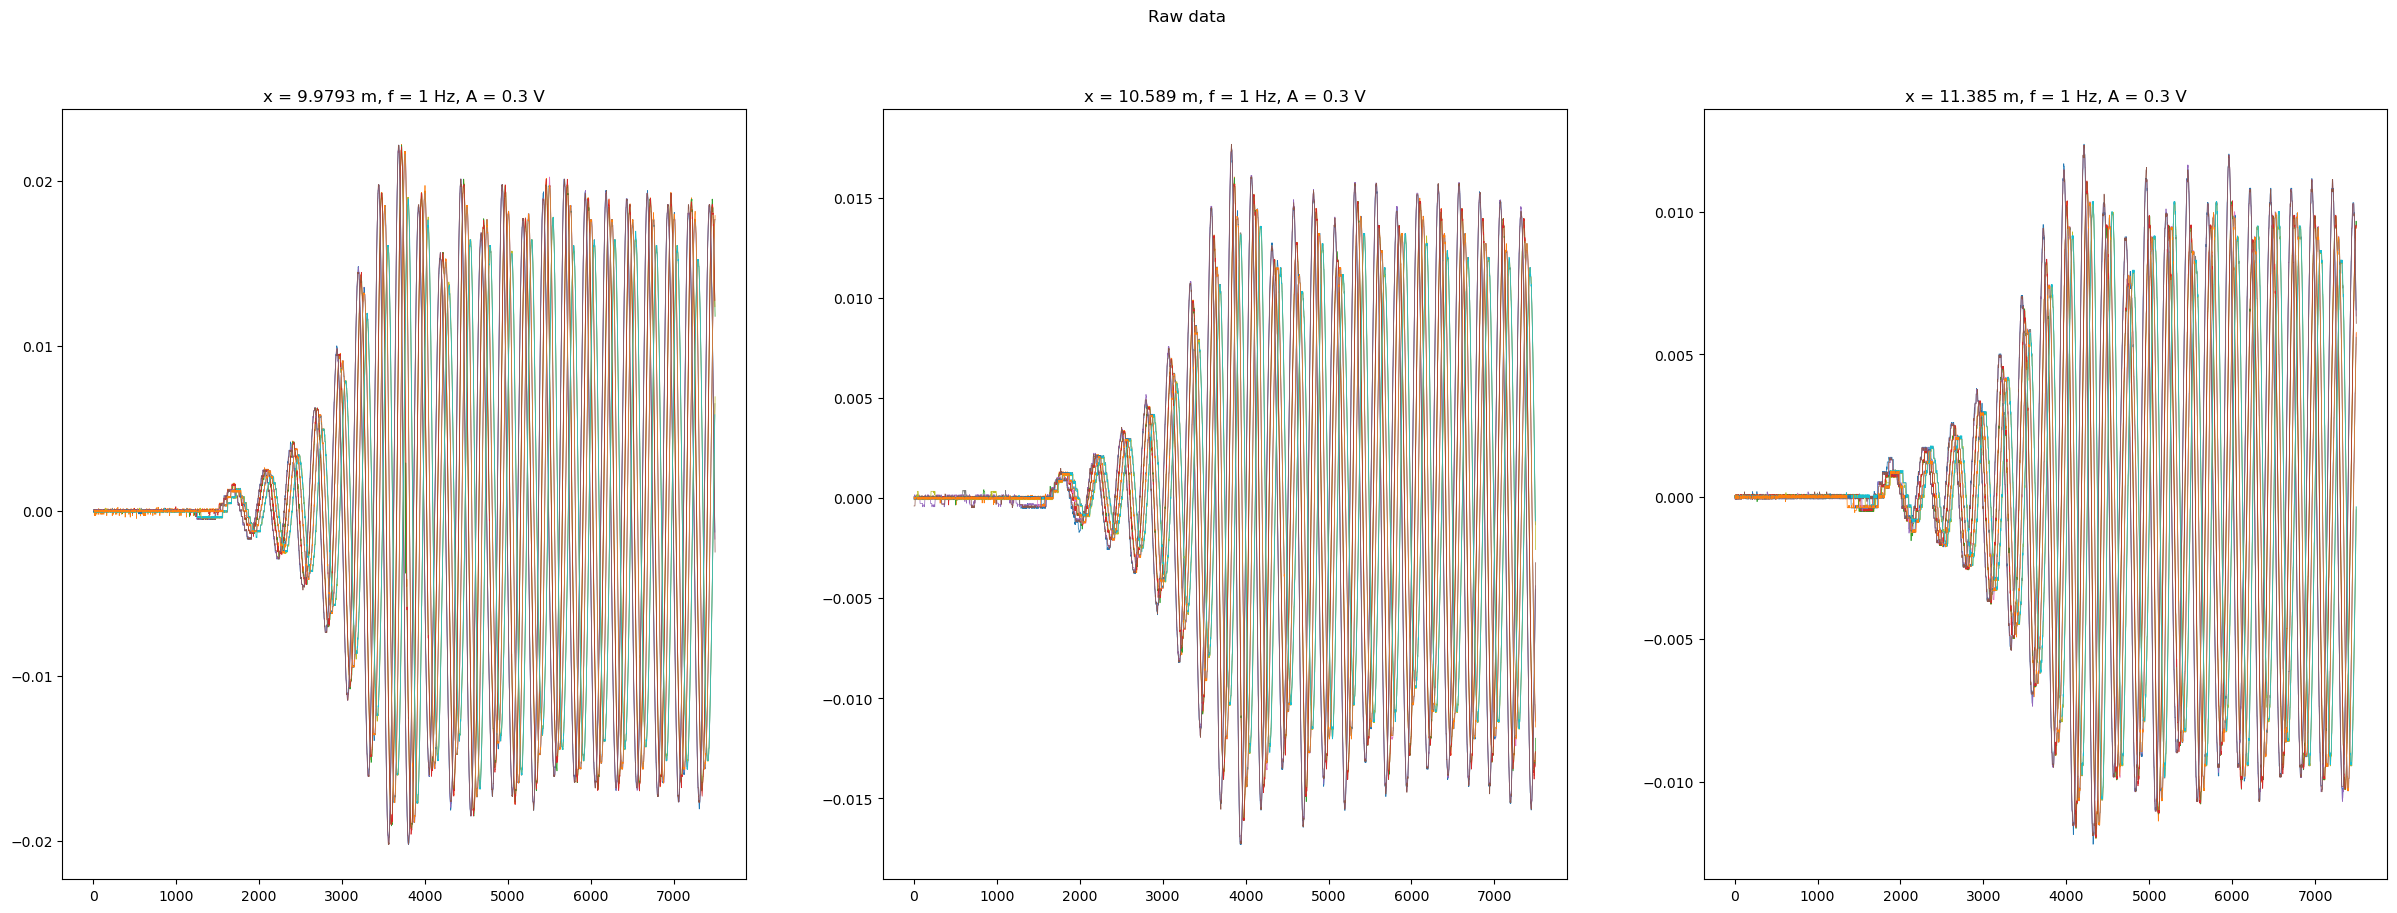

In [281]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))

for i in range(1,5):
    ax[0].plot(x9793_f1_r1[f'p{i}'], lw=0.5)
    ax[0].plot(x9793_f1_r2[f'p{i}'], lw= 0.5)
    ax[0].plot(x9793_f1_r3[f'p{i}'], lw= 0.5)

ax[0].set_title('x = 9.9793 m, f = 1 Hz, A = 0.3 V')

for i in range(1,5):
    ax[1].plot(x1059_f1_r1[f'p{i}'], lw=0.5)
    ax[1].plot(x1059_f1_r2[f'p{i}'], lw=0.5)
    ax[1].plot(x1059_f1_r3[f'p{i}'], lw=0.5)

ax[1].set_title('x = 10.589 m, f = 1 Hz, A = 0.3 V')

for i in range(1,5):
    ax[2].plot(x1135_f1_r1[f'p{i}'], lw=0.5)
    ax[2].plot(x1135_f1_r2[f'p{i}'], lw=0.5)
    ax[2].plot(x1135_f1_r3[f'p{i}'], lw=0.5)

ax[2].set_title('x = 11.385 m, f = 1 Hz, A = 0.3 V')

fig.suptitle('Raw data')

In [282]:
# Constants
f = 1
beach_loc = 9.983  # location of beach after wave maker [m]
g = 9.81 # gravity 
rho = 1000  # water density
nu = 10e-6  # water viscosity
H0 = 0.4  # water depth before beach
H1 = 0.2  # water depth over beach

In [283]:
# Phase and group velocity, shallow water waves

c0 = np.sqrt(g*H0)  # wave velocity before beach
c1 = np.sqrt(g*H1)  # wave velocity over beach

In [284]:
def time_of_arrival(df, position, wave_no):
    ''' 
    Find time of arrival of the wave number x for f = 1 Hz.
    Find index of where in df the wave arrives.
    The probes measure 124 times per second.
    '''

    if position > beach_loc:
        time_deep = beach_loc/c0
        time_shallow = (position - beach_loc)/c1

        arrival = time_deep + time_shallow + wave_no*f

    else:
        time_deep = position/c0
        arrival = time_deep + wave_no*f

    rows_per_second = df.groupby(pd.Grouper(key='time', freq='s')).size()

    index = int(rows_per_second.iloc[1]*arrival)

    return arrival, index

In [285]:
# Find the time in seconds for the 11th wave to reach the first probe
arrival_time_p1_x9, idx_time_p1_x9 = time_of_arrival(x9_f1_r1, x[0], 11)
arrival_time_p2_x9, idx_time_p2_x9 = time_of_arrival(x9_f1_r1, x[1], 11)
arrival_time_p3_x9, idx_time_p3_x9 = time_of_arrival(x9_f1_r1, x[2], 11)
arrival_time_p4_x9, idx_time_p4_x9 = time_of_arrival(x9_f1_r1, x[3], 11)

arrival_time_p1_x10, idx_time_p1_x10 = time_of_arrival(x10_f1_r1, x[4], 11)
arrival_time_p2_x10, idx_time_p2_x10 = time_of_arrival(x10_f1_r1, x[5], 11)
arrival_time_p3_x10, idx_time_p3_x10 = time_of_arrival(x10_f1_r1, x[6], 11)
arrival_time_p4_x10, idx_time_p4_x10 = time_of_arrival(x10_f1_r1, x[7], 11)

arrival_time_p1_x11, idx_time_p1_x11 = time_of_arrival(x11_f1_r1, x[8], 11)
arrival_time_p2_x11, idx_time_p2_x11 = time_of_arrival(x11_f1_r1, x[9], 11)
arrival_time_p3_x11, idx_time_p3_x11 = time_of_arrival(x11_f1_r1, x[10], 11)
arrival_time_p4_x11, idx_time_p4_x11 = time_of_arrival(x11_f1_r1, x[11], 11)

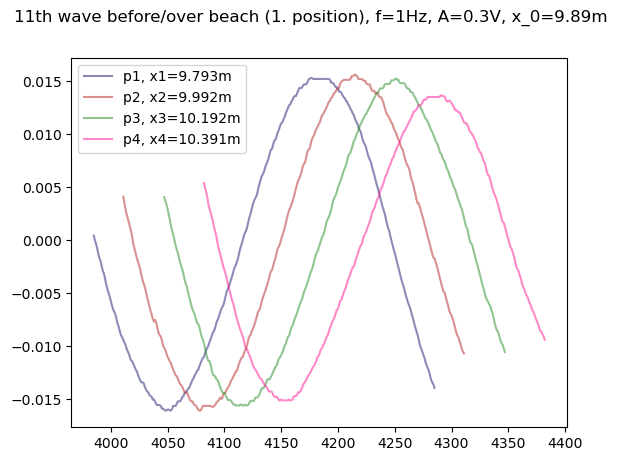

In [286]:
fig, ax = plt.subplots()

ax.plot(x9_f1_r1.loc[idx_time_p1_x9:idx_time_p1_x9+300, 'p1'], label=f'p1, x1={x[0]}m', color='midnightblue', alpha=0.5)
#ax.plot(x9_f1_r2.loc[idx_time_p1_x9:idx_time_p1_x9+300, 'p1'], label=f'p1, x1={x[0]}m', color='slateblue', alpha=0.5)
#ax.plot(x9_f1_r3.loc[idx_time_p1_x9:idx_time_p1_x9+300, 'p1'], label=f'p1, x1={x[0]}m', color='cornflowerblue', alpha=0.5)

ax.plot(x9_f1_r1.loc[idx_time_p2_x9:idx_time_p2_x9+300, 'p2'], label=f'p2, x2={x[1]}m', color='firebrick', alpha=0.5)
#ax.plot(x9_f1_r2.loc[idx_time_p2_x9:idx_time_p2_x9+300, 'p2'], label=f'p2, x2={x[1]}m', color='indianred', alpha=0.5)
#ax.plot(x9_f1_r3.loc[idx_time_p2_x9:idx_time_p2_x9+300, 'p2'], label=f'p2, x2={x[1]}m', color='lightcoral', alpha=0.5)

ax.plot(x9_f1_r1.loc[idx_time_p3_x9:idx_time_p3_x9+300, 'p3'], label=f'p3, x3={x[2]}m', color='forestgreen', alpha=0.5)
#ax.plot(x9_f1_r2.loc[idx_time_p3_x9:idx_time_p3_x9+300, 'p3'], label=f'p3, x3={x[2]}m', color='limegreen', alpha=0.5)
#ax.plot(x9_f1_r3.loc[idx_time_p3_x9:idx_time_p3_x9+300, 'p3'], label=f'p3, x3={x[2]}m', color='mediumseagreen', alpha=0.5)

ax.plot(x9_f1_r1.loc[idx_time_p4_x9:idx_time_p4_x9+300, 'p4'], label=f'p4, x4={x[3]}m', color='deeppink', alpha=0.5)
#ax.plot(x9_f1_r2.loc[idx_time_p4_x9:idx_time_p4_x9+300, 'p4'], label=f'p4, x4={x[3]}m', color='hotpink', alpha=0.5)
#ax.plot(x9_f1_r3.loc[idx_time_p4_x9:idx_time_p4_x9+300, 'p4'], label=f'p4, x4={x[3]}m', color='lightpink', alpha=0.5)

fig.suptitle('11th wave before/over beach (1. position), f=1Hz, A=0.3V, x_0=9.89m')
ax.legend()

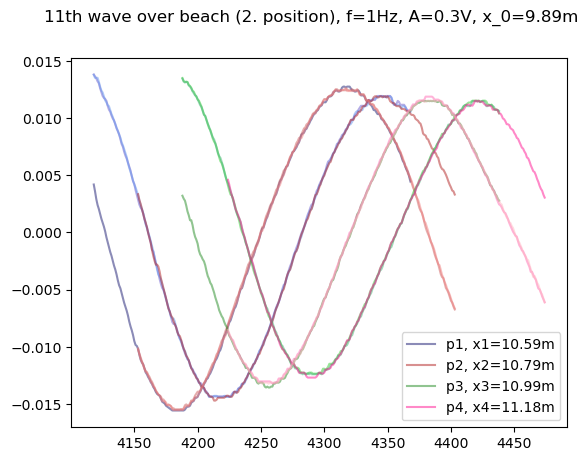

In [309]:
fig, ax = plt.subplots()

ax.plot(x10_f1_r1.loc[idx_time_p1_x10:idx_time_p1_x10+250, 'p1'], label='p1, x1=10.59m', color='midnightblue', alpha=0.5)
ax.plot(x10_f1_r2.loc[idx_time_p1_x10:idx_time_p1_x10+250, 'p1'],  color='slateblue', alpha=0.5)
ax.plot(x10_f1_r3.loc[idx_time_p1_x10:idx_time_p1_x10+250, 'p1'],   color='cornflowerblue', alpha=0.5)

ax.plot(x10_f1_r1.loc[idx_time_p2_x10:idx_time_p2_x10+250, 'p2'], label='p2, x2=10.79m', color='firebrick', alpha=0.5)
ax.plot(x10_f1_r2.loc[idx_time_p2_x10:idx_time_p2_x10+250, 'p2'],   color='indianred', alpha=0.5)
ax.plot(x10_f1_r3.loc[idx_time_p2_x10:idx_time_p2_x10+250, 'p2'],   color='lightcoral', alpha=0.5)

ax.plot(x10_f1_r1.loc[idx_time_p3_x10:idx_time_p3_x10+250, 'p3'], label='p3, x3=10.99m', color='forestgreen', alpha=0.5)
ax.plot(x10_f1_r2.loc[idx_time_p3_x10:idx_time_p3_x10+250, 'p3'],  color='limegreen', alpha=0.5)
ax.plot(x10_f1_r3.loc[idx_time_p3_x10:idx_time_p3_x10+250, 'p3'],  color='mediumseagreen', alpha=0.5)

ax.plot(x10_f1_r1.loc[idx_time_p4_x10:idx_time_p4_x10+250, 'p4'], label='p4, x4=11.18m', color='deeppink', alpha=0.5)
ax.plot(x10_f1_r2.loc[idx_time_p4_x10:idx_time_p4_x10+250, 'p4'],  color='hotpink', alpha=0.5)
ax.plot(x10_f1_r3.loc[idx_time_p4_x10:idx_time_p4_x10+250, 'p4'], color='lightpink', alpha=0.5)

fig.suptitle('11th wave over beach (2. position), f=1Hz, A=0.3V, x_0=9.89m')
ax.legend()

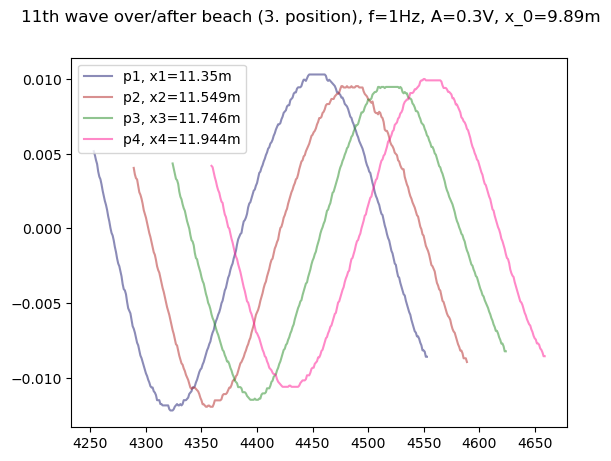

In [288]:
fig, ax = plt.subplots()

ax.plot(x11_f1_r1.loc[idx_time_p1_x11:idx_time_p1_x11+300, 'p1'], label=f'p1, x1={x[8]}m', color='midnightblue', alpha=0.5)
#ax.plot(x11_f1_r2.loc[idx_time_p1_x11:idx_time_p1_x11+300, 'p1'], label=f'p1, x1={x[8]}m', color='slateblue', alpha=0.5)
#ax.plot(x11_f1_r3.loc[idx_time_p1_x11:idx_time_p1_x11+300, 'p1'], label=f'p1, x1={x[8]}m', color='cornflowerblue', alpha=0.5)

ax.plot(x11_f1_r1.loc[idx_time_p2_x11:idx_time_p2_x11+300, 'p2'], label=f'p2, x2={x[9]}m', color='firebrick', alpha=0.5)
#ax.plot(x11_f1_r2.loc[idx_time_p2_x11:idx_time_p2_x11+300, 'p2'], label=f'p2, x2={x[9]}m', color='indianred', alpha=0.5)
#ax.plot(x11_f1_r3.loc[idx_time_p2_x11:idx_time_p2_x11+300, 'p2'], label=f'p2, x2={x[9]}m', color='lightcoral', alpha=0.5)

ax.plot(x11_f1_r1.loc[idx_time_p3_x11:idx_time_p3_x11+300, 'p3'], label=f'p3, x3={x[10]}m', color='forestgreen', alpha=0.5)
#ax.plot(x11_f1_r2.loc[idx_time_p3_x11:idx_time_p3_x11+300, 'p3'], label=f'p3, x3={x[10]}m', color='limegreen', alpha=0.5)
#ax.plot(x11_f1_r3.loc[idx_time_p3_x11:idx_time_p3_x11+300, 'p3'], label=f'p3, x3={x[10]}m', color='mediumseagreen', alpha=0.5)

ax.plot(x11_f1_r1.loc[idx_time_p4_x11:idx_time_p4_x11+300, 'p4'], label=f'p4, x4={x[11]}m', color='deeppink', alpha=0.5)
#ax.plot(x11_f1_r2.loc[idx_time_p4_x11:idx_time_p4_x11+300, 'p4'], label=f'p4, x4={x[11]}m', color='hotpink', alpha=0.5)
#ax.plot(x11_f1_r3.loc[idx_time_p4_x11:idx_time_p4_x11+300, 'p4'], label=f'p4, x4={x[11]}m', color='lightpink', alpha=0.5)

fig.suptitle('11th wave over/after beach (3. position), f=1Hz, A=0.3V, x_0=9.89m')
ax.legend()

In [289]:
def mean_height(df0, df1, df2):
    probes = ['p1', 'p2', 'p3', 'p4']
    dfs = [df0, df1, df2]
    
    mean_values = []
    for df in dfs:
        for p in probes:
            mean_values.append(df[p].mean()) 

    return np.array(mean_values)

In [290]:
mean_r1 = mean_height(x9_f1_r1, x10_f1_r1, x11_f1_r1)
mean_r2 = mean_height(x9_f1_r2, x10_f1_r2, x11_f1_r2)
mean_r3 = mean_height(x9_f1_r3, x10_f1_r3, x11_f1_r3)

Text(0.5, 0.98, 'Mean water height, 1 Hz waves')

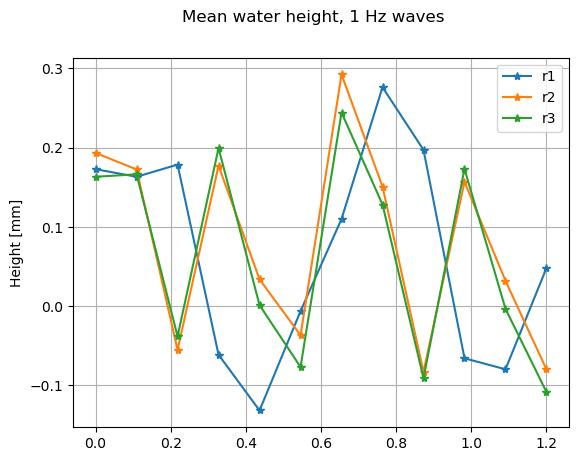

In [292]:
xs = np.linspace(0,1.2,12)

fig, ax = plt.subplots()
ax.plot(xs, mean_r1*1000, marker= '*', label='r1')
ax.plot(xs, mean_r2*1000, marker= '*',label='r2')
ax.plot(xs, mean_r3*1000, marker= '*',label='r3')

ax.legend()
ax.grid()
ax.set_ylabel('Height [mm]')
fig.suptitle('Mean water height, 1 Hz waves')

In [250]:
noise = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/Noise Measurement/Noise_Measurement_modified.csv')

Text(0.5, 1.0, 'Mean water height per probe, measured over 2 minutes')

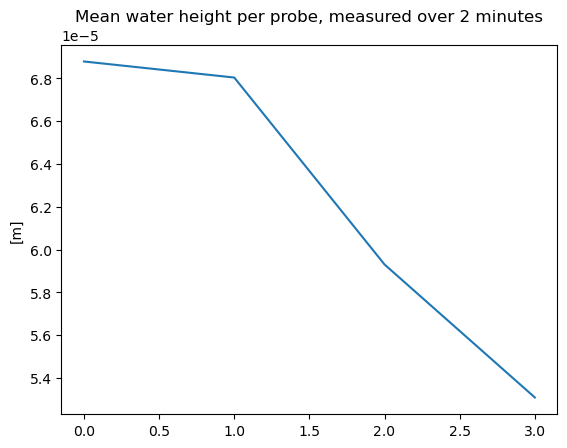

In [273]:
mean = []
for column in noise.columns[1:-1]:
    mean.append(noise[column].mean())
    
plt.plot(mean)
plt.ylabel('[m]')
plt.title('Mean water height per probe, measured over 2 minutes')

Amplitude of wave at x meters after start of beach: 

$A = A_0 exp(-\alpha x)$

where $A_0$ is the amplitude at $x=0$, meaning the beginning of the beach. 

Thus, the wave damping is:
$\alpha = \frac{ln(A_0) - ln(A(x_1))}{x_1 - x_0}$

In [296]:
def alpha_damp(A0, A1, x0, x1):
    alpha = (np.log(A0) - np.log(A1))/(x1 - x0)
    return alpha